# **Libraries**

Converged in 2660 iterations with error 9.99e-06
Time taken: 31.97 seconds


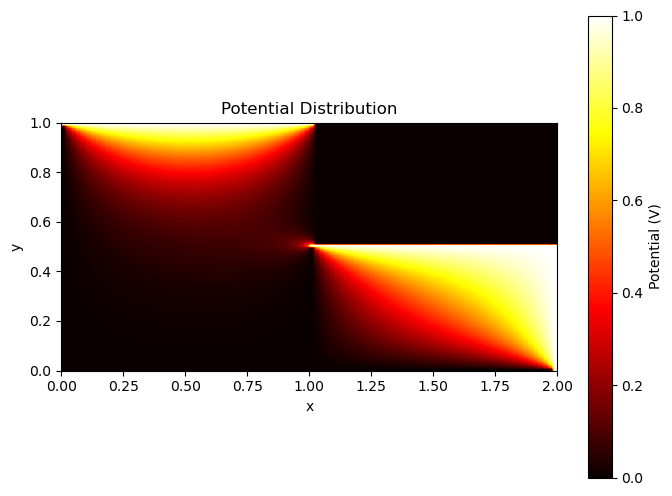

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the domain size and grid resolution
a, b = 1, 2  
nx, ny = 100, 100  
dx = b / nx
dy = a / ny

# Initialize the potential array with boundary conditions
v = np.zeros((ny, nx))
v[99, :51] = 1  # Top half of right boundary
v[50, 50:101] = 1  # Bottom half of top boundary
for i in range(0, nx//2 + 1):
    v[i, 99] = 1
for i in range(nx//2, nx):
    v[i, 50] = 1

# Plot initial conditions
# plt.figure(figsize=(8, 6))
# plt.imshow(v, cmap="hot", origin="lower", extent=[0, b, 0, a])
# plt.colorbar(label="Initial Potential (V)")
# plt.title("Initial Boundary and Internal Conditions")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

# Laplace solver function
def laplace(potential, tol=1e-5, max_steps=10000):
    ny, nx = potential.shape
    for step in range(max_steps):
        potential_old = potential.copy()
        for i in range(1, ny - 1):
            for j in range(1, nx - 1):
                if not ((i == ny//2 and j >= nx//2) or (j == nx//2 and i <= ny//2)):
                    potential[i, j] = 0.25 * (potential_old[i + 1, j] + potential_old[i - 1, j] +
                                              potential_old[i, j + 1] + potential_old[i, j - 1])
                # Ensuring the upper-right square has potential 1
                if (i > ny//2 and j > nx//2):
                    potential[i, j] = 0
        error = np.max(np.abs(potential - potential_old))
        if error < tol:
            print(f"Converged in {step} iterations with error {error:.2e}")
            break
    else:
        print("Did not converge within the maximum number of iterations.")
    return potential

# Solve the Laplace equation
start_time = time.time()
v = laplace(v)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Plot the resulting potential distribution
plt.figure(figsize=(8, 6))
plt.imshow(v, cmap="hot", origin="lower", extent=[0, b, 0, a])
plt.colorbar(label="Potential (V)")
plt.title("Potential Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


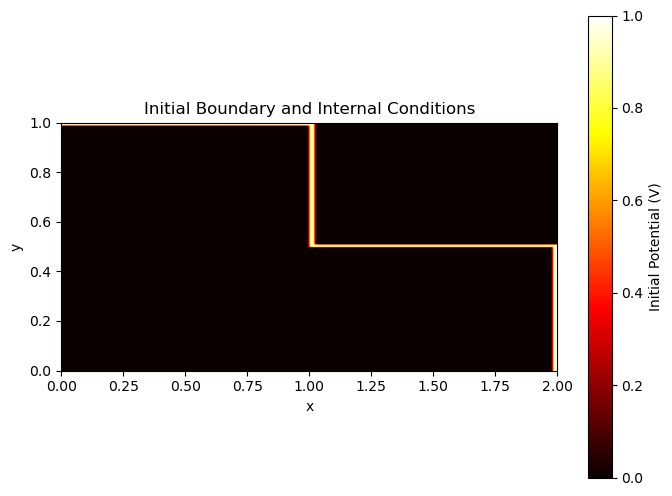

In [8]:
a, b = 1, 2  
nx, ny = 100, 100  
dx = b / nx
dy = a / ny

# Initialize the potential array with boundary conditions
v = np.zeros((ny, nx))
v[99, :51] = 1  # Top half of right boundary
v[50, 50:101] = 1  # Bottom half of top boundary
for i in range(0, nx//2 + 1):
    v[i, 99] = 1
for i in range(nx//2, nx):
    v[i, 50] = 1

# Plot initial conditions
plt.figure(figsize=(8, 6))
plt.imshow(v, cmap="hot", origin="lower", extent=[0, b, 0, a])
plt.colorbar(label="Initial Potential (V)")
plt.title("Initial Boundary and Internal Conditions")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation

# **Initial conditions**

In [165]:
a, b = 1, 2  

nx, ny = 100, 100  
dx = b / nx
dy = a / ny

v = np.zeros((ny, nx))

In [23]:
v

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
v.shape

(100, 100)

# **Boundry conditions & Functions**

In [167]:
v[99][0:51] = 1  
v[50][50:101] = 1
for i in range(0 , nx//2 + 1):
    v[i][99] = 1
for i in range(nx//2 , nx ):
    v[i][50] = 1

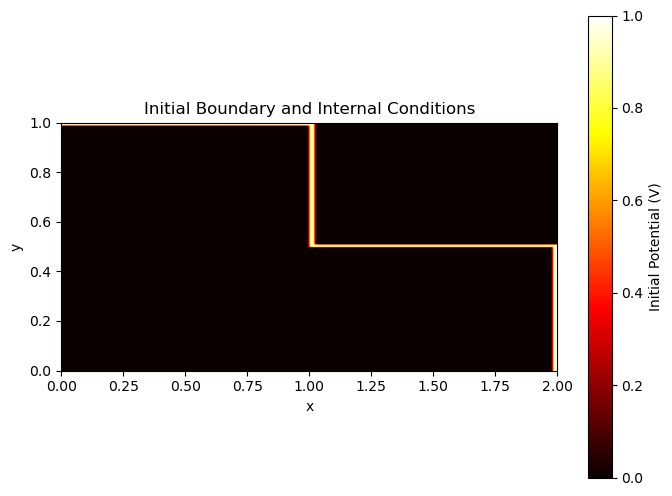

In [131]:
plt.figure(figsize=(8, 6))
plt.imshow(v, cmap="hot", origin="lower", extent=[0, b, 0, a])
plt.colorbar(label="Initial Potential (V)")
plt.title("Initial Boundary and Internal Conditions")
plt.xlabel("x")
plt.ylabel("y")
#plt.savefig("Initial Potential.png",dpi=300)
plt.show()

In [97]:
initial1 = v[99][0:51]   
initial2 = v[50][50:101]
initial3 = []
for i in range(0 , nx//2 + 1):
    v[i][99] = 1
    initial3.append(v[i])
initial4 = []
for i in range(nx//2 , nx ):
    v[i][50] = 1
    initial4.append(v[i])
intials = [initial1 , initial2 , initial3 , initial4]

In [169]:
def laplace(potential, tol=1e-5, max_steps=10000):
    ny, nx = potential.shape
    for step in range(max_steps):
        potential_old = potential.copy()
        for i in range(1, ny - 1 ):
            for j in range(1, nx - 1):
                # if (i == 0 or j == 0 or  
                #     i == ny - 1 or j == nx - 1 or 
                if (i == ny//2 and j >= nx//2) or (j == nx//2 and i <= ny//2):
                    continue
                potential[i, j] = 0.25 * (potential_old[i + 1, j] + potential_old[i - 1, j] +
                                          potential_old[i, j + 1] + potential_old[i, j - 1])
        for j in range(1, nx - 1 ):
            for i in range(1, ny - 1):
                # if (i == 0 or j == 0 or  
                #     i == ny - 1 or j == nx - 1 or 
                if (i == ny//2 and j >= nx//2) or (j == nx//2 and i <= ny//2):
                    continue
                potential[i, j] = 0.25 * (potential_old[i + 1, j] + potential_old[i - 1, j] +
                                          potential_old[i, j + 1] + potential_old[i, j - 1])
        for i in range(ny//2 + 1 , ny - 1):
            for j in range(nx//2 + 1 , nx - 1):
                # if (i == 0 or j == 0 or  
                #     i == ny - 1 or j == nx - 1 or 
                #     (i == ny//2 and j >= nx//2) or 
                #     (j == nx//2 and i <= ny//2)):  
                #     continue
                potential[i,j] = 0
        error = np.max(np.abs(potential - potential_old))
        if error < tol:
            print(f"Converged in {step} iterations with error {error}")
            break
    else:
        print("Did not converge within the maximum number of iterations.")
    return potential

# **Results**

In [171]:
start_time = time.time()
v = laplace(v)
end_time = time.time()

print(f"Time taken: {end_time - start_time:.2f} seconds")

Converged in 2660 iterations with error 9.992581728068828e-06
Time taken: 122.04 seconds


In [118]:
v[99][0:51] = 1  
v[50][50:101] = 1
for i in range(0 , nx//2 + 1):
    v[i][99] = 1
for i in range(nx//2 , nx ):
    v[i][50] = 1

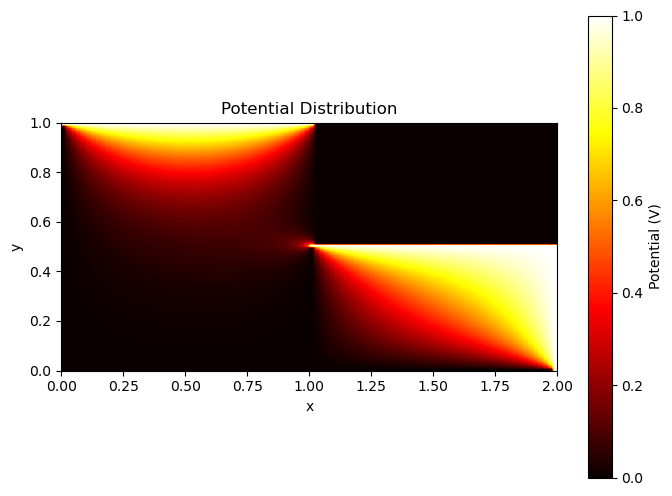

In [173]:
plt.figure(figsize=(8, 6))
plt.imshow(v, cmap="hot", origin="lower", extent=[0, b, 0, a])
plt.colorbar(label="Potential (V)")
plt.title("Potential Distribution")
plt.xlabel("x")
plt.ylabel("y")
#plt.savefig("Potential.png",dpi=300)
plt.show()

In [14]:
Ex, Ey = np.gradient(-v, dx, dy)

In [15]:
print(f"Potential is = {np.mean(v)}")

Potential is = 0.3382160606827279


In [16]:
print(f"Electric field in x axis is = {np.mean(Ex)}")

Electric field in x axis is = -0.2646378008218324


In [17]:
print(f"Electric field in y axis is = {np.mean(Ey)}")

Electric field in y axis is = -0.5191757221730748


# **Plots**

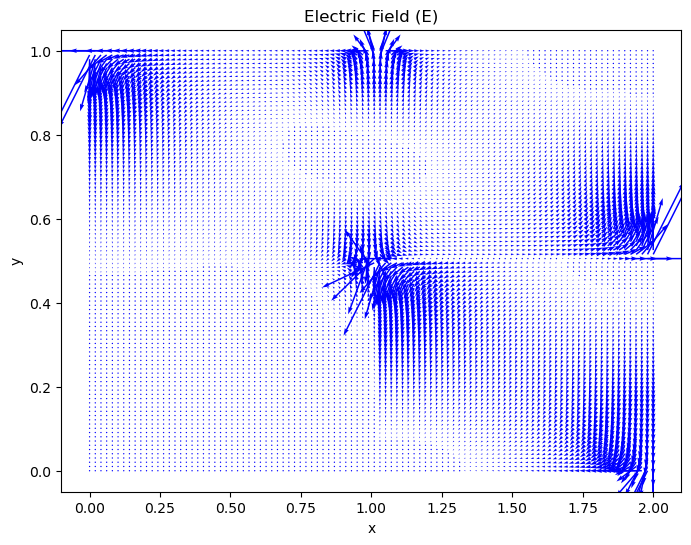

In [19]:
x = np.linspace(0, b, nx)
y = np.linspace(0, a, ny)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))
plt.quiver(X, Y, Ex, Ey, color="blue")
plt.title("Electric Field (E)")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("Electric Field.png",dpi=300)
plt.show()

Converged in 270 iterations with error 9.671668556698876e-06
Converged in 923 iterations with error 9.99386876887609e-06
Converged in 1824 iterations with error 9.993747182190926e-06
Converged in 2901 iterations with error 9.978515842778979e-06


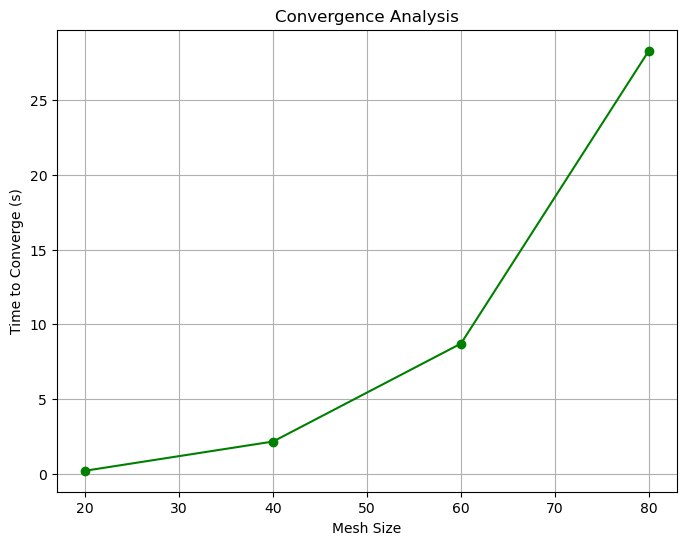

In [20]:
mesh_sizes = [20, 40, 60, 80]
times = []

for mesh in mesh_sizes:
    nx, ny = mesh, mesh
    dx = a / (nx)
    dy = b / (ny)
    v = np.zeros((ny, nx))
    v[mesh-1][0:mesh//2 + 1] = 1  
    v[mesh//2][mesh//2:mesh+1] = 1
    for i in range(0 , mesh//2 + 1):
        v[i][mesh-1] = 1
    for i in range(mesh//2 , mesh ):
        v[i][mesh//2] = 1
    start_time = time.time()
    v = laplace(v)
    end_time = time.time()
    times.append(end_time - start_time)

plt.figure(figsize=(8, 6))
plt.plot(mesh_sizes, times, marker='o' , c='g')
plt.title("Convergence Analysis")
plt.xlabel("Mesh Size")
plt.ylabel("Time to Converge (s)")
plt.grid()
plt.savefig("Time vs Mesh .png",dpi=300)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(v, cmap="hot", origin="lower", extent=[0, b, 0, b])
plt.colorbar(im, label="Potential (V)")
plt.title("Potential Distribution (Evolution)")
plt.xlabel("x")
plt.ylabel("y")

def update(frame):
    global v
    v_old = v.copy()
    for i in range(1, ny - 1):
        for j in range(1, nx - 1):
            v[i, j] = 0.25 * (v_old[i + 1, j] + v[i - 1, j] +
                              v_old[i, j + 1] + v[i, j - 1])
    im.set_array(v)
    return [im]

frames = 10000
ani = FuncAnimation(fig, update, frames=frames, blit=True, interval=50)

ani.save('laplace_eq.gif', writer='imagemagick', fps=20)

plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


In [41]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.
